In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('irisdata.csv' )
df

,x1,x2,x3,x4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df['class'] = df['class'].str.replace('Iris-setosa','1')
df['class'] = df['class'].str.replace('Iris-virginica','0')

df = df.astype('float64')

In [15]:
import numpy as np

alpha = 0.1
teta = np.array([0.6,0.55,0.4,0.3])
bias = 0.4
epoch = 60
e = 0
adteta = np.empty(4)
sumerr = np.zeros(60)


In [16]:
#defining H, Sigmoid, and error function 
def H(x,teta,bias,i):
    return np.dot(x.iloc[i,:4],np.transpose(teta))+bias

import math as mt

#S = sigmoid
def S(H):
    return 1/(1+ mt.exp(-H))

def error(S,i):
    return (S-(df.iloc[i,4]))**2

In [17]:
#defining the prediction classes
def pre(S):
    if S > 0.5:
        predict = 1
        return pre
    else:
        predict = 0
        return pre

In [18]:
#defining delta teta, delta bias, new teta, and new bias
def dteta(S,fact,ax,i):
    return 2*(S-fact)*(1-S)*S*ax[i]

def dbias(S,fact):
    return 2*(S-fact)*(1-S)*S

def nteta(teta,alpha,dteta,i):
    return teta[i]-(alpha*dteta[i])

def nbias(bias,alpha,dbias,i):
    return bias[i]-(alpha*dbias[i])

def chgbias(bias,alpha,dbiasfunc):
    bias = nbias(bias,alpha,dbiasfunc)

In [19]:
#looping for 60 iteration
for n in range(60):
    e=0
    
    #print all values of each x1,x2,x3,x4 and the real classes(fact)
    for i in range(100):
        ax = np.array(df.iloc[i,:4])
        print('X1, X2, X3, X4=',ax)
        
        fact = np.array(df.iloc[i,4])
        print('Fact =',fact)
        

    #print H function
        Hfunc = H(df,teta,bias,i)
        print('H =',Hfunc)
    #Print Sigmoid function    
        Sfunc = S(Hfunc)
        print('Sigmoid =',Sfunc)
    #Print Error function    
        errfunc = error(Sfunc,i)
        print('Error =',errfunc)
        e += errfunc
    #Print Prediction function    
        prefunc = pre(Sfunc)
        print('Prediction =',prefunc)
        
        for j in range(len(ax)):
            adteta[j] = dteta(Sfunc,fact,ax,j)
        dbiasfunc = dbias(Sfunc,fact)
        
        for j in range(len(teta)):
            teta[j]= nteta(teta,alpha,adteta,j)
    
    sumerr[n]=e
    print('Sum of the Error:',sumerr[n])    
        
    

X1, X2, X3, X4= [ 5.1  3.5  1.4  0.2]
Fact = 1.0
H = 6.005
Sigmoid = 0.9975396787614879
Error = 6.05318059667e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.   1.4  0.2]
Fact = 1.0
H = 5.61004527508
Sigmoid = 0.9963524497236932
Error = 1.33046230182e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.7  3.2  1.3  0.2]
Fact = 1.0
H = 5.56013616009
Sigmoid = 0.996166499892397
Error = 1.4695723075e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6  3.1  1.5  0.2]
Fact = 1.0
H = 5.52523227926
Sigmoid = 0.996030873776608
Error = 1.57539629772e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.6  1.4  0.2]
Fact = 1.0
H = 6.00036921745
Sigmoid = 0.9975282873543777
Error = 6.10936340253e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.9  1.7  0.4]
Fact = 1.0
H = 6.58545513174
Sigmoid = 0.9986216035924691
Error = 1.89997665629e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6

X1, X2, X3, X4= [ 5.4  3.4  1.7  0.2]
Fact = 1.0
H = 6.14916491104
Sigmoid = 0.9978692854771142
Error = 4.53994437804e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.7  1.5  0.4]
Fact = 1.0
H = 6.11749983135
Sigmoid = 0.9978008874042237
Error = 4.8360962089e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6  3.6  1.   0.2]
Fact = 1.0
H = 5.51501712223
Sigmoid = 0.9959902841421033
Error = 1.60778212611e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.3  1.7  0.5]
Fact = 1.0
H = 6.00729720868
Sigmoid = 0.9975453102883401
Error = 6.02550158053e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.4  1.9  0.2]
Fact = 1.0
H = 5.87445711134
Sigmoid = 0.9971975562910872
Error = 7.85369074162e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.   1.6  0.2]
Fact = 1.0
H = 5.65738195535
Sigmoid = 0.9965205029445324
Error = 1.2106899759e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, 

Error = 9.87121275205e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.   1.6  0.2]
Fact = 1.0
H = 5.54615894117
Sigmoid = 0.9961127517576949
Error = 1.51106988973e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.4  1.6  0.4]
Fact = 1.0
H = 5.81991632555
Sigmoid = 0.997040928622358
Error = 8.75610341798e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.2  3.5  1.5  0.2]
Fact = 1.0
H = 5.89257838447
Sigmoid = 0.9972477442604974
Error = 7.57491165562e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.2  3.4  1.4  0.2]
Fact = 1.0
H = 5.80108725095
Sigmoid = 0.9969848537782405
Error = 9.09110673859e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.7  3.2  1.6  0.2]
Fact = 1.0
H = 5.48196508219
Sigmoid = 0.9958560987056468
Error = 1.71719179373e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.1  1.6  0.2]
Fact = 1.0
H = 5.48563882656
Sigmoid = 0.9958712316704765
Error = 1.7

Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.4  1.6  0.2]
Fact = 1.0
H = 5.50983744129
Sigmoid = 0.99596954513767
Error = 1.62445663973e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.   1.4  0.1]
Fact = 1.0
H = 5.19679955103
Sigmoid = 0.9944962111468773
Error = 3.02916917398e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.3  3.   1.1  0.1]
Fact = 1.0
H = 4.81025723328
Sigmoid = 0.9919200532731561
Error = 6.52855391086e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  4.   1.2  0.2]
Fact = 1.0
H = 6.24045931245
Sigmoid = 0.9980548309214209
Error = 3.78368274426e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.7  4.4  1.5  0.4]
Fact = 1.0
H = 6.56283753679
Sigmoid = 0.9985901167998646
Error = 1.98777063802e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.9  1.3  0.4]
Fact = 1.0
H = 6.05830010032
Sigmoid = 0.9976670827200658
Error = 5.44250303502e-06
Prediction =

X1, X2, X3, X4= [ 6.9  3.1  5.1  2.3]
Fact = 0.0
H = 8.1454754321
Sigmoid = 0.9997100393792642
Error = 0.999420162836
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  2.7  5.1  1.9]
Fact = 0.0
H = 7.22763187619
Sigmoid = 0.9992742883883975
Error = 0.998549103434
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.8  3.2  5.9  2.3]
Fact = 0.0
H = 8.40369103093
Sigmoid = 0.9997760113203582
Error = 0.999552072812
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.3  5.7  2.5]
Fact = 0.0
H = 8.38478504401
Sigmoid = 0.9997717372848189
Error = 0.999543526674
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.   5.2  2.3]
Fact = 0.0
H = 7.99565661095
Sigmoid = 0.9996631906373195
Error = 0.999326494715
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.5  5.   1.9]
Fact = 0.0
H = 7.3340553233
Sigmoid = 0.9993475056192251
Error = 0.998695436987
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.

Sigmoid = 0.9997401294532131
Error = 0.999480326439
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  2.8  4.8  1.8]
Fact = 0.0
H = 7.13010991525
Sigmoid = 0.9992000091167514
Error = 0.998400658219
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.1  3.   4.9  1.8]
Fact = 0.0
H = 7.20225420793
Sigmoid = 0.9992556497258749
Error = 0.998511853509
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  2.8  5.6  2.1]
Fact = 0.0
H = 7.55525817313
Sigmoid = 0.9994769227437104
Error = 0.998954119097
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.2  3.   5.8  1.6]
Fact = 0.0
H = 7.99108386584
Sigmoid = 0.999661647489541
Error = 0.999323409462
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.4  2.8  6.1  1.9]
Fact = 0.0
H = 8.1651080826
Sigmoid = 0.9997156749545602
Error = 0.99943143075
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.9  3.8  6.4  2. ]
Fact = 0.0
H = 9.05457706825
Sigmoid = 0.9998831586955836
Er

Sigmoid = 0.9986587962173559
Error = 0.997319391262
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.1  2.6  5.6  1.4]
Fact = 0.0
H = 6.51779259016
Sigmoid = 0.998525252405593
Error = 0.997052679692
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  3.   6.1  2.3]
Fact = 0.0
H = 7.81604075622
Sigmoid = 0.9995969475638248
Error = 0.999194057579
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  3.4  5.6  2.4]
Fact = 0.0
H = 7.23192724343
Sigmoid = 0.9992773966534338
Error = 0.998555315462
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  3.1  5.5  1.8]
Fact = 0.0
H = 6.93579566505
Sigmoid = 0.9990285954476883
Error = 0.998058134522
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.   3.   4.8  1.8]
Fact = 0.0
H = 6.48604332663
Sigmoid = 0.9984777514605836
Error = 0.996957820162
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.9  3.1  5.4  2.1]
Fact = 0.0
H = 7.17673928506
Sigmoid = 0.999236428010322
E

Sigmoid = 0.9986712839662527
Error = 0.997344333419
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.6  2.8  4.9  2. ]
Fact = 0.0
H = 5.61951603698
Sigmoid = 0.9963867075026933
Error = 0.992786470888
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  2.8  6.7  2. ]
Fact = 0.0
H = 6.83740353682
Sigmoid = 0.9989282643556754
Error = 0.997857677329
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.7  4.9  1.8]
Fact = 0.0
H = 5.74193868708
Sigmoid = 0.9968017199325165
Error = 0.99361366886
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.3  5.7  2.1]
Fact = 0.0
H = 6.38251023501
Sigmoid = 0.9983119810899377
Error = 0.996626811588
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.2  3.2  6.   1.8]
Fact = 0.0
H = 6.50097654776
Sigmoid = 0.9985002808063814
Error = 0.99700281077
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  2.8  4.8  1.8]
Fact = 0.0
H = 5.62518071192
Sigmoid = 0.9964070444336424
E

Error = 0.00437747059439
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.5  1.8]
Fact = 0.0
H = -2.86144341195
Sigmoid = 0.05409279820525277
Error = 0.00292603081767
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  3.8  6.7  2.2]
Fact = 0.0
H = -3.54733203223
Sigmoid = 0.02799508145580659
Error = 0.000783724585717
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  2.6  6.9  2.3]
Fact = 0.0
H = -3.85832527862
Sigmoid = 0.020667166449315356
Error = 0.000427131769044
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.   2.2  5.   1.5]
Fact = 0.0
H = -2.74822359542
Sigmoid = 0.060187053268859154
Error = 0.00362248138119
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.9  3.2  5.7  2.3]
Fact = 0.0
H = -3.13116983587
Sigmoid = 0.04183968421719861
Error = 0.00175055917539
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.6  2.8  4.9  2. ]
Fact = 0.0
H = -2.56538565217
Sigmoid = 0.0713996389247371
E

Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  2.7  5.3  1.9]
Fact = 0.0
H = -2.72809341429
Sigmoid = 0.06133584035617765
Error = 0.0037620853122
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.8  3.   5.5  2.1]
Fact = 0.0
H = -2.86451398159
Sigmoid = 0.05393590202632639
Error = 0.00290908152739
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.7  2.5  5.   2. ]
Fact = 0.0
H = -2.65032963816
Sigmoid = 0.06596869532766148
Error = 0.00435186876323
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  2.8  5.1  2.4]
Fact = 0.0
H = -2.71712164183
Sigmoid = 0.06197057505871197
Error = 0.00384035217311
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  3.2  5.3  2.3]
Fact = 0.0
H = -2.81343374251
Sigmoid = 0.056602544027506446
Error = 0.00320384799039
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.5  1.8]
Fact = 0.0
H = -3.01485292969
Sigmoid = 0.04675936001596301
Error = 0.0021864377491
Predi

X1, X2, X3, X4= [ 7.7  2.6  6.9  2.3]
Fact = 0.0
H = -4.53293284614
Sigmoid = 0.01063478986293835
Error = 0.000113098755429
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.   2.2  5.   1.5]
Fact = 0.0
H = -2.9876624447
Sigmoid = 0.047986365201760084
Error = 0.00230269124528
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.9  3.2  5.7  2.3]
Fact = 0.0
H = -3.28773264424
Sigmoid = 0.03599443777613311
Error = 0.00129559955082
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.6  2.8  4.9  2. ]
Fact = 0.0
H = -2.76598335362
Sigmoid = 0.059190292021831306
Error = 0.00350349066963
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  2.8  6.7  2. ]
Fact = 0.0
H = -4.32934232896
Sigmoid = 0.013004855542163574
Error = 0.000169126267673
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.7  4.9  1.8]
Fact = 0.0
H = -2.83147314431
Sigmoid = 0.05564693298250293
Error = 0.00309658115036
Prediction = <function pre at 0x10edf86a8>


Error = 0.0150483382618
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.3  2.9  6.3  1.8]
Fact = 0.0
H = -3.26291141004
Sigmoid = 0.036865695476379017
Error = 0.00135907950296
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  2.5  5.8  1.8]
Fact = 0.0
H = -3.14827294471
Sigmoid = 0.041159382949154354
Error = 0.00169409480476
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.2  3.6  6.1  2.5]
Fact = 0.0
H = -2.91856480968
Sigmoid = 0.0512434314212054
Error = 0.00262588926382
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.2  5.1  2. ]
Fact = 0.0
H = -2.22068471931
Sigmoid = 0.09790831167875967
Error = 0.00958603749579
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  2.7  5.3  1.9]
Fact = 0.0
H = -2.83938886923
Sigmoid = 0.05523241901905053
Error = 0.0030506201107
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.8  3.   5.5  2.1]
Fact = 0.0
H = -2.91103966569
Sigmoid = 0.0516105233476401
Error 

X1, X2, X3, X4= [ 5.7  2.5  5.   2. ]
Fact = 0.0
H = -2.88300982278
Sigmoid = 0.052999867338060135
Error = 0.00280898593785
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  2.8  5.1  2.4]
Fact = 0.0
H = -2.94375395047
Sigmoid = 0.05003254889545061
Error = 0.00250325594898
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  3.2  5.3  2.3]
Fact = 0.0
H = -2.77602066978
Sigmoid = 0.05863381283098331
Error = 0.0034379240071
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.5  1.8]
Fact = 0.0
H = -2.98287186102
Sigmoid = 0.04820569117534044
Error = 0.00232378866169
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  3.8  6.7  2.2]
Fact = 0.0
H = -3.70123765797
Sigmoid = 0.024097898030816033
Error = 0.000580708689504
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  2.6  6.9  2.3]
Fact = 0.0
H = -4.8031950513
Sigmoid = 0.008136744804747012
Error = 6.62066160176e-05
Prediction = <function pre at 0x10edf86a8>
X

Sigmoid = 0.04793532372875371
Error = 0.00229779526098
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  3.2  5.3  2.3]
Fact = 0.0
H = -2.76927697657
Sigmoid = 0.05900714676177724
Error = 0.00348184336897
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.5  1.8]
Fact = 0.0
H = -2.97891993598
Sigmoid = 0.04838733709955691
Error = 0.00234133439159
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  3.8  6.7  2.2]
Fact = 0.0
H = -3.69841948267
Sigmoid = 0.024164262555490455
Error = 0.000583911584851
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  2.6  6.9  2.3]
Fact = 0.0
H = -4.90945192256
Sigmoid = 0.0073225153780870555
Error = 5.36192314623e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.   2.2  5.   1.5]
Fact = 0.0
H = -3.04803807936
Sigmoid = 0.04530225081079147
Error = 0.00205229392852
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.9  3.2  5.7  2.3]
Fact = 0.0
H = -3.26361882432

Error = 0.00226249284768
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  3.8  6.7  2.2]
Fact = 0.0
H = -3.71977337684
Sigmoid = 0.023665813886808343
Error = 0.000560070746925
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  2.6  6.9  2.3]
Fact = 0.0
H = -5.01786407166
Sigmoid = 0.006575130105851444
Error = 4.32323359089e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.   2.2  5.   1.5]
Fact = 0.0
H = -3.0840308013
Sigmoid = 0.04377079596408189
Error = 0.00191588257933
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.9  3.2  5.7  2.3]
Fact = 0.0
H = -3.28326375835
Sigmoid = 0.03614982487486401
Error = 0.00130680983848
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.6  2.8  4.9  2. ]
Fact = 0.0
H = -2.83806714715
Sigmoid = 0.055301429413596025
Error = 0.00305824809519
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  2.8  6.7  2. ]
Fact = 0.0
H = -4.58094352833
Sigmoid = 0.010141324918186733

Error = 8.88823522676e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.7  4.9  1.8]
Fact = 0.0
H = -2.71203945245
Sigmoid = 0.06226666235669789
Error = 0.00387713724104
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.3  5.7  2.1]
Fact = 0.0
H = -3.31700462012
Sigmoid = 0.03499241559358299
Error = 0.00122446914907
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.2  3.2  6.   1.8]
Fact = 0.0
H = -3.53099196986
Sigmoid = 0.028443162620686552
Error = 0.000809013499867
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  2.8  4.8  1.8]
Fact = 0.0
H = -2.60968445105
Sigmoid = 0.06851774028221361
Error = 0.00469468073338
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.1  3.   4.9  1.8]
Fact = 0.0
H = -2.65574344872
Sigmoid = 0.06563589631279941
Error = 0.00430807088478
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  2.8  5.6  2.1]
Fact = 0.0
H = -3.87115575562
Sigmoid = 0.020409068013825166


Fact = 0.0
H = -3.56499931273
Sigmoid = 0.027518318925642722
Error = 0.000757257876493
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  2.8  4.8  1.8]
Fact = 0.0
H = -2.62505749616
Sigmoid = 0.0675430698836581
Error = 0.00456206628931
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.1  3.   4.9  1.8]
Fact = 0.0
H = -2.66923639314
Sigmoid = 0.06481323733545186
Error = 0.0042007557339
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  2.8  5.6  2.1]
Fact = 0.0
H = -3.92581614538
Sigmoid = 0.01934444193000247
Error = 0.000374207433583
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.2  3.   5.8  1.6]
Fact = 0.0
H = -3.53242628523
Sigmoid = 0.028403553332794776
Error = 0.000806761841929
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.4  2.8  6.1  1.9]
Fact = 0.0
H = -4.2352002083
Sigmoid = 0.014270321330598999
Error = 0.000203642070879
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.9  3.8  6.4  2. ]


X1, X2, X3, X4= [ 7.4  2.8  6.1  1.9]
Fact = 0.0
H = -4.28516324724
Sigmoid = 0.01358429875134186
Error = 0.000184533172566
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.9  3.8  6.4  2. ]
Fact = 0.0
H = -3.67568978852
Sigmoid = 0.02470607340424782
Error = 0.000610390063056
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  2.8  5.6  2.2]
Fact = 0.0
H = -4.07198850022
Sigmoid = 0.016757852012285118
Error = 0.000280825604066
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.8  5.1  1.5]
Fact = 0.0
H = -3.02399501837
Sigmoid = 0.04635355471549979
Error = 0.00214865203476
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.1  2.6  5.6  1.4]
Fact = 0.0
H = -3.94555973926
Sigmoid = 0.018973434190515757
Error = 0.000359991204982
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  3.   6.1  2.3]
Fact = 0.0
H = -4.29386251737
Sigmoid = 0.013468222475252487
Error = 0.000181393016643
Prediction = <function pre at 0x10edf86

Error = 0.000299029185301
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.2  3.   5.8  1.6]
Fact = 0.0
H = -3.59523880576
Sigmoid = 0.02672053718977042
Error = 0.00071398710771
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.4  2.8  6.1  1.9]
Fact = 0.0
H = -4.33735937528
Sigmoid = 0.01290235165708726
Error = 0.000166470678283
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.9  3.8  6.4  2. ]
Fact = 0.0
H = -3.70377711519
Sigmoid = 0.024038249254097917
Error = 0.000577837427202
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  2.8  5.6  2.2]
Fact = 0.0
H = -4.12907743632
Sigmoid = 0.015842691880956196
Error = 0.000250990886035
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.8  5.1  1.5]
Fact = 0.0
H = -3.04963790731
Sigmoid = 0.04523310863257589
Error = 0.00204603411657
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.1  2.6  5.6  1.4]
Fact = 0.0
H = -3.99540882905
Sigmoid = 0.0180674821791037

Error = 0.00346518855645
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.9  3.1  5.4  2.1]
Fact = 0.0
H = -3.48582847155
Sigmoid = 0.029718154454623995
Error = 0.000883168704189
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.1  5.6  2.4]
Fact = 0.0
H = -4.03872680015
Sigmoid = 0.017314806762647482
Error = 0.000299802533228
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.9  3.1  5.1  2.3]
Fact = 0.0
H = -3.18290291081
Sigmoid = 0.03981421009290947
Error = 0.00158517132532
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  2.7  5.1  1.9]
Fact = 0.0
H = -3.72172567512
Sigmoid = 0.02362074650880938
Error = 0.000557939665633
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.8  3.2  5.9  2.3]
Fact = 0.0
H = -4.33341738367
Sigmoid = 0.012952652913095487
Error = 0.000167771217487
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.3  5.7  2.5]
Fact = 0.0
H = -4.09418717867
Sigmoid = 0.016395980578332

Sigmoid = 0.022767239936079646
Error = 0.000518347214307
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.8  3.2  5.9  2.3]
Fact = 0.0
H = -4.37509439111
Sigmoid = 0.012430492057001582
Error = 0.000154517132779
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.3  5.7  2.5]
Fact = 0.0
H = -4.13232272375
Sigmoid = 0.015792171752738785
Error = 0.000249392688668
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.   5.2  2.3]
Fact = 0.0
H = -3.56320016205
Sigmoid = 0.02756650705685122
Error = 0.000759912311315
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.5  5.   1.9]
Fact = 0.0
H = -3.66616896261
Sigmoid = 0.02493652530854076
Error = 0.000621830294463
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.2  2. ]
Fact = 0.0
H = -3.47004372577
Sigmoid = 0.030176701778186144
Error = 0.00091063333021
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  3.4  5.4  2.3]
Fact = 0.0
H = -3.6690220

Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.5  5.   1.9]
Fact = 0.0
H = -3.69621222374
Sigmoid = 0.024216365197573347
Error = 0.000586432343382
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.2  2. ]
Fact = 0.0
H = -3.49411780793
Sigmoid = 0.029480061086787607
Error = 0.000869074001681
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  3.4  5.4  2.3]
Fact = 0.0
H = -3.69799449335
Sigmoid = 0.024174285979504075
Error = 0.000584396102619
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.9  3.   5.1  1.8]
Fact = 0.0
H = -3.44694675481
Sigmoid = 0.03086004422024176
Error = 0.000952342329275
Prediction = <function pre at 0x10edf86a8>
Sum of the Error: 0.124022750774
X1, X2, X3, X4= [ 5.1  3.5  1.4  0.2]
Fact = 1.0
H = 3.44924794841
Sigmoid = 0.9692087049414083
Error = 0.000948103851385
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.   1.4  0.2]
Fact = 1.0
H = 2.87806984322
Sigmoid = 0.946751642

Fact = 0.0
H = -3.72565445764
Sigmoid = 0.023530307138039618
Error = 0.00055367535401
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.2  2. ]
Fact = 0.0
H = -3.51827876145
Sigmoid = 0.028796595386942125
Error = 0.000829243905879
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  3.4  5.4  2.3]
Fact = 0.0
H = -3.72658669996
Sigmoid = 0.02350889686141083
Error = 0.00055266823164
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.9  3.   5.1  1.8]
Fact = 0.0
H = -3.47177617198
Sigmoid = 0.030126041136477613
Error = 0.000907578354557
Prediction = <function pre at 0x10edf86a8>
Sum of the Error: 0.11236066074
X1, X2, X3, X4= [ 5.1  3.5  1.4  0.2]
Fact = 1.0
H = 3.53171341096
Sigmoid = 0.9715767670093474
Error = 0.000807880173641
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.   1.4  0.2]
Fact = 1.0
H = 2.94866765154
Sigmoid = 0.950200480144691
Error = 0.00247999217782
Prediction = <function pre at 0x10edf86a8>
X1, X2, X

Error = 0.00287201373836
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.6  1.4  0.2]
Fact = 1.0
H = 3.7236479174
Sigmoid = 0.9764235452214267
Error = 0.000555849219926
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.9  1.7  0.4]
Fact = 1.0
H = 3.5910288303
Sigmoid = 0.9731697574473186
Error = 0.000719861915436
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6  3.4  1.4  0.3]
Fact = 1.0
H = 3.3084383275
Sigmoid = 0.9647171632108225
Error = 0.00124487857189
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.4  1.5  0.2]
Fact = 1.0
H = 3.37397059426
Sigmoid = 0.9668810737539384
Error = 0.00109686327569
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.4  2.9  1.4  0.2]
Fact = 1.0
H = 2.78536825082
Sigmoid = 0.9418800115834145
Error = 0.00337793305354
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.1  1.5  0.1]
Fact = 1.0
H = 3.11293022334
Sigmoid = 0.9574229643165934
Error = 0.0018128

Sigmoid = 0.9686202706918398
Error = 0.000984687411453
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.4  2.9  1.4  0.2]
Fact = 1.0
H = 2.83057336149
Sigmoid = 0.9443057642043323
Error = 0.00310184790086
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.1  1.5  0.1]
Fact = 1.0
H = 3.16239130445
Sigmoid = 0.9593942067937823
Error = 0.00164883044191
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.7  1.5  0.2]
Fact = 1.0
H = 3.94638507501
Sigmoid = 0.9810419220519411
Error = 0.000359408719485
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.4  1.6  0.2]
Fact = 1.0
H = 3.23453311383
Sigmoid = 0.9621133372405105
Error = 0.00143539921505
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.   1.4  0.1]
Fact = 1.0
H = 3.19958940558
Sigmoid = 0.9608188228847202
Error = 0.00153516464014
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.3  3.   1.1  0.1]
Fact = 1.0
H = 3.49211091667
Sigmoid = 0.97

Error = 0.00141152101293
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.3  3.   1.1  0.1]
Fact = 1.0
H = 3.53710240601
Sigmoid = 0.9717252084118687
Error = 0.000799463839352
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  4.   1.2  0.2]
Fact = 1.0
H = 5.00082014439
Sigmoid = 0.9933125992367678
Error = 4.47213289681e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.7  4.4  1.5  0.4]
Fact = 1.0
H = 4.77915051653
Sigmoid = 0.9916668899822334
Error = 6.94407225682e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.9  1.3  0.4]
Fact = 1.0
H = 4.43827173553
Sigmoid = 0.988321652705174
Error = 0.000136383795539
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.5  1.4  0.3]
Fact = 1.0
H = 3.78978464159
Sigmoid = 0.9778990238870813
Error = 0.000488453145144
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.7  3.8  1.7  0.3]
Fact = 1.0
H = 3.87660194181
Sigmoid = 0.9796995311472679
Error = 0.00

X1, X2, X3, X4= [ 5.4  3.4  1.7  0.2]
Fact = 1.0
H = 3.4353007408
Sigmoid = 0.9687897407846093
Error = 0.000974080280292
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.7  1.5  0.4]
Fact = 1.0
H = 3.84175899207
Sigmoid = 0.9789948552597099
Error = 0.000441216105561
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6  3.6  1.   0.2]
Fact = 1.0
H = 4.48130780483
Sigmoid = 0.9888080759718711
Error = 0.000125259163451
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.3  1.7  0.5]
Fact = 1.0
H = 3.01182238264
Sigmoid = 0.953105373952447
Error = 0.00219910595214
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.4  1.9  0.2]
Fact = 1.0
H = 2.89346328123
Sigmoid = 0.9475223560081145
Error = 0.00275390311894
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.   1.6  0.2]
Fact = 1.0
H = 3.04232456353
Sigmoid = 0.9544499969082443
Error = 0.00207480278166
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4=

Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.4  1.7  0.2]
Fact = 1.0
H = 3.47359643468
Sigmoid = 0.9699270986766069
Error = 0.000904379394007
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.7  1.5  0.4]
Fact = 1.0
H = 3.88233884741
Sigmoid = 0.9798133153449057
Error = 0.000407502237364
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6  3.6  1.   0.2]
Fact = 1.0
H = 4.52760842281
Sigmoid = 0.989309041981042
Error = 0.000114296583363
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.3  1.7  0.5]
Fact = 1.0
H = 3.04371661359
Sigmoid = 0.9545104782921962
Error = 0.0020692965852
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.4  1.9  0.2]
Fact = 1.0
H = 2.9230799413
Sigmoid = 0.9489756389292313
Error = 0.00260348542268
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.   1.6  0.2]
Fact = 1.0
H = 3.07285401588
Sigmoid = 0.9557590079323367
Error = 0.00195726537913
Prediction = <fu

Sigmoid = 0.9569663619789031
Error = 0.00185189400133
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.4  1.6  0.4]
Fact = 1.0
H = 3.42611237675
Sigmoid = 0.9685107198704188
Error = 0.000991574763079
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.2  3.5  1.5  0.2]
Fact = 1.0
H = 3.93665913907
Sigmoid = 0.9808601837413597
Error = 0.000366332566415
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.2  3.4  1.4  0.2]
Fact = 1.0
H = 3.99281184774
Sigmoid = 0.9818863869401883
Error = 0.000328102978081
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.7  3.2  1.6  0.2]
Fact = 1.0
H = 3.22443888984
Sigmoid = 0.9617436687769285
Error = 0.00146354687865
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.1  1.6  0.2]
Fact = 1.0
H = 3.16436282636
Sigmoid = 0.9594709417753979
Error = 0.00164260456057
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.4  1.5  0.4]
Fact = 1.0
H = 3.79923536595
Sigmoid = 0.9

Sigmoid = 0.981476654368417
Error = 0.000343114333387
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.2  3.4  1.4  0.2]
Fact = 1.0
H = 4.02655639458
Sigmoid = 0.9824768926498217
Error = 0.000307059291206
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.7  3.2  1.6  0.2]
Fact = 1.0
H = 3.25087912858
Sigmoid = 0.9627046900565918
Error = 0.00139094014377
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.1  1.6  0.2]
Fact = 1.0
H = 3.1899105634
Sigmoid = 0.9604528235011013
Error = 0.00156397916904
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.4  1.5  0.4]
Fact = 1.0
H = 3.82963773203
Sigmoid = 0.9787441419561568
Error = 0.00045181150118
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.2  4.1  1.5  0.1]
Fact = 1.0
H = 4.7539859861
Sigmoid = 0.9914563447505561
Error = 7.29940450214e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.5  4.2  1.4  0.2]
Fact = 1.0
H = 5.09612748915
Sigmoid = 0.9939

X1, X2, X3, X4= [ 4.6  3.6  1.   0.2]
Fact = 1.0
H = 4.65158490923
Sigmoid = 0.9905438134414338
Error = 8.94194642304e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.3  1.7  0.5]
Fact = 1.0
H = 3.12947949161
Sigmoid = 0.9580924988558897
Error = 0.00175623865214
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.4  1.9  0.2]
Fact = 1.0
H = 3.0029768805
Sigmoid = 0.9527084312978282
Error = 0.00223649247031
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.   1.6  0.2]
Fact = 1.0
H = 3.15539886841
Sigmoid = 0.9591209259810174
Error = 0.00167109869265
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.4  1.6  0.4]
Fact = 1.0
H = 3.48245013223
Sigmoid = 0.9701842762567819
Error = 0.000888977382332
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.2  3.5  1.5  0.2]
Fact = 1.0
H = 4.0017908538
Sigmoid = 0.9820453940728316
Error = 0.000322367874
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 

Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.5  3.5  1.3  0.2]
Fact = 1.0
H = 4.54204925743
Sigmoid = 0.9894607035189578
Error = 0.000111076770315
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.1  1.5  0.1]
Fact = 1.0
H = 3.54546609413
Sigmoid = 0.9719540990931407
Error = 0.000786572557677
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.4  3.   1.3  0.2]
Fact = 1.0
H = 3.48013025334
Sigmoid = 0.9701170964608926
Error = 0.000892987923928
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.4  1.5  0.2]
Fact = 1.0
H = 3.92124404833
Sigmoid = 0.980568633442313
Error = 0.000377578006299
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.5  1.3  0.3]
Fact = 1.0
H = 4.2630073128
Sigmoid = 0.9861155949535125
Error = 0.000192776703495
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.5  2.3  1.3  0.3]
Fact = 1.0
H = 2.65250459835
Sigmoid = 0.9341651923740462
Error = 0.00433422189515
Prediction = 

H = 3.56912626467
Sigmoid = 0.9725919075991758
Error = 0.000751203529052
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.4  3.   1.3  0.2]
Fact = 1.0
H = 3.50263174007
Sigmoid = 0.9707625575262127
Error = 0.000854828042408
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.4  1.5  0.2]
Fact = 1.0
H = 3.94679063383
Sigmoid = 0.9810494634349348
Error = 0.000359122836104
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.5  1.3  0.3]
Fact = 1.0
H = 4.29059961367
Sigmoid = 0.9864883549846896
Error = 0.00018256455102
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.5  2.3  1.3  0.3]
Fact = 1.0
H = 2.66907798922
Sigmoid = 0.9351771607480696
Error = 0.00420200048868
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.4  3.2  1.3  0.2]
Fact = 1.0
H = 3.76687024586
Sigmoid = 0.9773983248527922
Error = 0.00051083571946
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.5  1.6  0.6]
Fact = 1.0
H = 3.5908748

Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.8  1.9  0.4]
Fact = 1.0
H = 3.64415865234
Sigmoid = 0.9745226677057696
Error = 0.000649094460831
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.   1.4  0.3]
Fact = 1.0
H = 3.50559537837
Sigmoid = 0.9708465560757421
Error = 0.000849923292645
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.8  1.6  0.2]
Fact = 1.0
H = 4.31840556677
Sigmoid = 0.9868540128580015
Error = 0.000172816977938
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6  3.2  1.4  0.2]
Fact = 1.0
H = 3.72822491086
Sigmoid = 0.976528680941217
Error = 0.000550902818359
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.3  3.7  1.5  0.2]
Fact = 1.0
H = 4.47089124328
Sigmoid = 0.9886922104715482
Error = 0.00012786610402
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.3  1.4  0.2]
Fact = 1.0
H = 4.03521661247
Sigmoid = 0.9826253660745742
Error = 0.000301877904043
Prediction =

Fact = 1.0
H = 4.49536861347
Sigmoid = 0.9889626175130318
Error = 0.000121823812164
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.3  1.4  0.2]
Fact = 1.0
H = 4.05708689539
Sigmoid = 0.9829948375243793
Error = 0.000289175550822
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  3.3  6.   2.5]
Fact = 0.0
H = -4.9954102767
Sigmoid = 0.00672343285308578
Error = 4.520454933e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  2.7  5.1  1.9]
Fact = 0.0
H = -3.93800206478
Sigmoid = 0.019114621138595703
Error = 0.000365368741272
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.1  3.   5.9  2.1]
Fact = 0.0
H = -4.51655153224
Sigmoid = 0.010808537944318403
Error = 0.000116824492494
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.9  5.6  1.8]
Fact = 0.0
H = -4.26856589129
Sigmoid = 0.013808504343270531
Error = 0.000190674792198
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.8  2.2]
Fa

Fact = 0.0
H = -3.96867001314
Sigmoid = 0.018548020536164368
Error = 0.00034402906581
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.1  3.   5.9  2.1]
Fact = 0.0
H = -4.55062022839
Sigmoid = 0.010450290451515411
Error = 0.000109208570521
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.9  5.6  1.8]
Fact = 0.0
H = -4.30074911188
Sigmoid = 0.013377027382339118
Error = 0.000178944861588
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.8  2.2]
Fact = 0.0
H = -4.7368200432
Sigmoid = 0.008690295639225822
Error = 7.55212382971e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.6  3.   6.6  2.1]
Fact = 0.0
H = -5.54383184319
Sigmoid = 0.0038962694967421743
Error = 1.51809159912e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  2.5  4.5  1.7]
Fact = 0.0
H = -3.44374605865
Sigmoid = 0.030955913559823106
Error = 0.000958268584323
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.3  2.9  6.3

H = 4.54182021938
Sigmoid = 0.9894583147921088
Error = 0.000111127127022
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.3  1.4  0.2]
Fact = 1.0
H = 4.09861786938
Sigmoid = 0.9836753209516051
Error = 0.000266495146033
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  3.3  6.   2.5]
Fact = 0.0
H = -5.07082412596
Sigmoid = 0.006238086770571979
Error = 3.89137265572e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  2.7  5.1  1.9]
Fact = 0.0
H = -3.99786689572
Sigmoid = 0.01802392512010979
Error = 0.000324861876735
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.1  3.   5.9  2.1]
Fact = 0.0
H = -4.58305758854
Sigmoid = 0.010120124932728273
Error = 0.000102416928654
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.9  5.6  1.8]
Fact = 0.0
H = -4.33140895057
Sigmoid = 0.012978355626512304
Error = 0.000168437714768
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.8  2.2]
Fact = 0.0

H = -4.52108649957
Sigmoid = 0.010760158783621772
Error = 0.000115781017049
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.2  5.1  2. ]
Fact = 0.0
H = -3.19286182666
Sigmoid = 0.03943523029131406
Error = 0.00155513738813
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  2.7  5.3  1.9]
Fact = 0.0
H = -4.14205766667
Sigmoid = 0.01564157474950305
Error = 0.000244658860644
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.8  3.   5.5  2.1]
Fact = 0.0
H = -4.10205879829
Sigmoid = 0.016269515841264317
Error = 0.000264697145709
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.7  2.5  5.   2. ]
Fact = 0.0
H = -4.26492931778
Sigmoid = 0.013858114240640002
Error = 0.000192047330307
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  2.8  5.1  2.4]
Fact = 0.0
H = -4.33945017394
Sigmoid = 0.012875750594989471
Error = 0.000165784953384
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  3.2  5.3  2.3]
Fact =

Error = 0.000182704526603
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  2.8  5.1  2.4]
Fact = 0.0
H = -4.36555117175
Sigmoid = 0.012548191137034611
Error = 0.000157457100812
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  3.2  5.3  2.3]
Fact = 0.0
H = -3.88136981048
Sigmoid = 0.020205860327523053
Error = 0.000408276791575
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.5  1.8]
Fact = 0.0
H = -4.05714706993
Sigmoid = 0.01700415662791134
Error = 0.000289141342627
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  3.8  6.7  2.2]
Fact = 0.0
H = -4.96905541512
Sigmoid = 0.0069017444070161495
Error = 4.76340758598e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  2.6  6.9  2.3]
Fact = 0.0
H = -6.84641722636
Sigmoid = 0.0010621289732528668
Error = 1.12811795582e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.   2.2  5.   1.5]
Fact = 0.0
H = -4.14534967852
Sigmoid = 0.0155909686

H = -4.99567769546
Sigmoid = 0.006721647205105717
Error = 4.51805411499e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  2.6  6.9  2.3]
Fact = 0.0
H = -6.88203651415
Sigmoid = 0.0010250006415767625
Error = 1.05062631523e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.   2.2  5.   1.5]
Fact = 0.0
H = -4.16725139805
Sigmoid = 0.015258365480284804
Error = 0.00023281771713
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.9  3.2  5.7  2.3]
Fact = 0.0
H = -4.39624644909
Sigmoid = 0.012173489993227312
Error = 0.000148193858615
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.6  2.8  4.9  2. ]
Fact = 0.0
H = -3.84116061926
Sigmoid = 0.021017453163446224
Error = 0.000441733337478
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  2.8  6.7  2. ]
Fact = 0.0
H = -6.06798183701
Sigmoid = 0.002310491510851192
Error = 5.33837102172e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.7  4.9  1.8]
Fac

H = -4.41904830549
Sigmoid = 0.011902318996464363
Error = 0.000141665197494
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.6  2.8  4.9  2. ]
Fact = 0.0
H = -3.86150561168
Sigmoid = 0.020602894430732932
Error = 0.000424479258924
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  2.8  6.7  2. ]
Fact = 0.0
H = -6.09746929373
Sigmoid = 0.0022435063089087464
Error = 5.03332055811e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.7  4.9  1.8]
Fact = 0.0
H = -3.50006908795
Sigmoid = 0.02931026505424468
Error = 0.00085909163755
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.3  5.7  2.1]
Fact = 0.0
H = -4.26242634135
Sigmoid = 0.013892361738535926
Error = 0.000192997714674
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.2  3.2  6.   1.8]
Fact = 0.0
H = -4.45720707561
Sigmoid = 0.011461805026724663
Error = 0.000131372974471
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  2.8  4.8  1.8]
Fact

Error = 0.000126176947114
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  2.8  4.8  1.8]
Fact = 0.0
H = -3.27963093856
Sigmoid = 0.03627661678479657
Error = 0.00131599292535
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.1  3.   4.9  1.8]
Fact = 0.0
H = -3.28290411532
Sigmoid = 0.036162358012797234
Error = 0.00130771613705
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  2.8  5.6  2.1]
Fact = 0.0
H = -4.90097259875
Sigmoid = 0.0073844088960209895
Error = 5.45294947436e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.2  3.   5.8  1.6]
Fact = 0.0
H = -4.25113027881
Sigmoid = 0.01404796338136463
Error = 0.000197345275164
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.4  2.8  6.1  1.9]
Fact = 0.0
H = -5.17873974324
Sigmoid = 0.005603527162573606
Error = 3.13995166617e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.9  3.8  6.4  2. ]
Fact = 0.0
H = -4.34433873744
Sigmoid = 0.01281376485329

Error = 0.00019084993587
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.4  2.8  6.1  1.9]
Fact = 0.0
H = -5.19975682962
Sigmoid = 0.005487625845123959
Error = 3.01140374161e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.9  3.8  6.4  2. ]
Fact = 0.0
H = -4.36154652339
Sigmoid = 0.012597908655539912
Error = 0.000158707302493
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  2.8  5.6  2.2]
Fact = 0.0
H = -5.00805024275
Sigmoid = 0.006639544435141743
Error = 4.40835503062e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.8  5.1  1.5]
Fact = 0.0
H = -3.60154962513
Sigmoid = 0.026556903829877247
Error = 0.000705269141029
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.1  2.6  5.6  1.4]
Fact = 0.0
H = -4.78288963342
Sigmoid = 0.008302267928334165
Error = 6.89276527538e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  3.   6.1  2.3]
Fact = 0.0
H = -5.14268369633
Sigmoid = 0.005808059897

H = -4.80160132187
Sigmoid = 0.008149617146845953
Error = 6.64162596402e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 7.7  3.   6.1  2.3]
Fact = 0.0
H = -5.16236814799
Sigmoid = 0.00569549411284603
Error = 3.24386531895e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  3.4  5.6  2.4]
Fact = 0.0
H = -4.51058505752
Sigmoid = 0.010872516329364649
Error = 0.000118211611332
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.4  3.1  5.5  1.8]
Fact = 0.0
H = -4.17899033507
Sigmoid = 0.015082981531701895
Error = 0.000227496331886
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.   3.   4.8  1.8]
Fact = 0.0
H = -3.2190066185
Sigmoid = 0.03845670171086317
Error = 0.00147891790648
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.9  3.1  5.4  2.1]
Fact = 0.0
H = -4.0184764257
Sigmoid = 0.01766275612963624
Error = 0.000311972954095
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.1  5.6  2.4]
Fact = 0.

H = -5.0544193374
Sigmoid = 0.006340611047181768
Error = 4.02033484516e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.3  5.7  2.5]
Fact = 0.0
H = -4.7709199881
Sigmoid = 0.008401400346332435
Error = 7.05835277794e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.   5.2  2.3]
Fact = 0.0
H = -4.06485253211
Sigmoid = 0.016875837909268707
Error = 0.00028479390514
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.5  5.   1.9]
Fact = 0.0
H = -4.19270452964
Sigmoid = 0.014880599579030361
Error = 0.000221432243831
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.2  2. ]
Fact = 0.0
H = -3.9317923632
Sigmoid = 0.019231396735512277
Error = 0.000369846620399
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  3.4  5.4  2.3]
Fact = 0.0
H = -4.19423892751
Sigmoid = 0.014858123318968998
Error = 0.000220763828562
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.9  3.   5.1  1.8]
Fact = 

Fact = 0.0
H = -3.65880485499
Sigmoid = 0.025116209136653626
Error = 0.000630823961396
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  2.7  5.1  1.9]
Fact = 0.0
H = -4.37703400664
Sigmoid = 0.012406703889167814
Error = 0.000153926301393
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.8  3.2  5.9  2.3]
Fact = 0.0
H = -5.0718845318
Sigmoid = 0.006231516571971447
Error = 3.88317987868e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.3  5.7  2.5]
Fact = 0.0
H = -4.78751138408
Sigmoid = 0.008264301828226805
Error = 6.8298684708e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.   5.2  2.3]
Fact = 0.0
H = -4.07839402616
Sigmoid = 0.016652634045767098
Error = 0.000277310220662
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.5  5.   1.9]
Fact = 0.0
H = -4.20660009855
Sigmoid = 0.014678269275416135
Error = 0.000215451588922
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.2 

Error = 3.7539129521e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.3  5.7  2.5]
Fact = 0.0
H = -4.80369616076
Sigmoid = 0.008132701578402863
Error = 6.61408349634e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.7  3.   5.2  2.3]
Fact = 0.0
H = -4.09161386354
Sigmoid = 0.016437532510529287
Error = 0.000270192475035
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.3  2.5  5.   1.9]
Fact = 0.0
H = -4.22016047661
Sigmoid = 0.0144834332298656
Error = 0.000209769838124
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.2  2. ]
Fact = 0.0
H = -3.9569160476
Sigmoid = 0.01876320486889237
Error = 0.000352057856952
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  3.4  5.4  2.3]
Fact = 0.0
H = -4.22224476653
Sigmoid = 0.014453712863661981
Error = 0.000208909815545
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.9  3.   5.1  1.8]
Fact = 0.0
H = -3.91146315768
Sigmoid = 0.0196186081958402

X1, X2, X3, X4= [ 5.9  3.   5.1  1.8]
Fact = 0.0
H = -3.92357779478
Sigmoid = 0.019386949681017774
Error = 0.000375853817934
Prediction = <function pre at 0x10edf86a8>
Sum of the Error: 0.0318315630064
X1, X2, X3, X4= [ 5.1  3.5  1.4  0.2]
Fact = 1.0
H = 4.46670629025
Sigmoid = 0.9886453272020632
Error = 0.000128928594348
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.   1.4  0.2]
Fact = 1.0
H = 3.74893757386
Sigmoid = 0.9769987671579651
Error = 0.000529056712254
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.7  3.2  1.3  0.2]
Fact = 1.0
H = 4.0897591266
Sigmoid = 0.9835324544170808
Error = 0.000271180057526
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6  3.1  1.5  0.2]
Fact = 1.0
H = 3.5467143184
Sigmoid = 0.9719881048110397
Error = 0.000784666272077
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.6  1.4  0.2]
Fact = 1.0
H = 4.55476107929
Sigmoid = 0.9895924437369448
Error = 0.000108317227369
Prediction = <func

Error = 0.00012423459526
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.   1.4  0.2]
Fact = 1.0
H = 3.76494926473
Sigmoid = 0.9773558498274668
Error = 0.000512757537036
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.7  3.2  1.3  0.2]
Fact = 1.0
H = 4.10666673734
Sigmoid = 0.983804069236421
Error = 0.000262308173299
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6  3.1  1.5  0.2]
Fact = 1.0
H = 3.56153451248
Sigmoid = 0.9723888073970581
Error = 0.000762377956957
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.6  1.4  0.2]
Fact = 1.0
H = 4.57331169981
Sigmoid = 0.9897817760205164
Error = 0.000104412101295
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.9  1.7  0.4]
Fact = 1.0
H = 4.42403804152
Sigmoid = 0.9881562208675119
Error = 0.000140275104139
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6  3.4  1.4  0.3]
Fact = 1.0
H = 4.04876236873
Sigmoid = 0.9828551239055078
Error = 0.00

Fact = 1.0
H = 4.06451669627
Sigmoid = 0.9831185893194352
Error = 0.000284982026566
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.4  1.5  0.2]
Fact = 1.0
H = 4.15763728737
Sigmoid = 0.9845965019885317
Error = 0.000237267750989
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.4  2.9  1.4  0.2]
Fact = 1.0
H = 3.42387227959
Sigmoid = 0.9684423303004732
Error = 0.000995886516864
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.1  1.5  0.1]
Fact = 1.0
H = 3.82142650844
Sigmoid = 0.9785726420632331
Error = 0.00045913166815
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.7  1.5  0.2]
Fact = 1.0
H = 4.74352845565
Sigmoid = 0.9913673057556885
Error = 7.45234099158e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.4  1.6  0.2]
Fact = 1.0
H = 3.88384001177
Sigmoid = 0.9798429857721436
Error = 0.000406305222582
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.   1.4  0.1]
Fact = 1.0


Fact = 0.0
H = -4.27134007773
Sigmoid = 0.013770776855790734
Error = 0.000189634295212
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.5  3.   5.2  2. ]
Fact = 0.0
H = -4.00386924926
Sigmoid = 0.017917995855721295
Error = 0.000321054575486
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 6.2  3.4  5.4  2.3]
Fact = 0.0
H = -4.27455202287
Sigmoid = 0.013727223028105107
Error = 0.000188436652063
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.9  3.   5.1  1.8]
Fact = 0.0
H = -3.95835377796
Sigmoid = 0.01873675291027735
Error = 0.000351065909621
Prediction = <function pre at 0x10edf86a8>
Sum of the Error: 0.029395670386
X1, X2, X3, X4= [ 5.1  3.5  1.4  0.2]
Fact = 1.0
H = 4.52138766182
Sigmoid = 0.9892430464288161
Error = 0.000115712050133
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.   1.4  0.2]
Fact = 1.0
H = 3.79561691607
Sigmoid = 0.9780247233425079
Error = 0.000482912784173
Prediction = <function pre at 0x10edf86a8>
X1, 

Sigmoid = 0.9973522156008826
Error = 7.01076222421e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.7  4.4  1.5  0.4]
Fact = 1.0
H = 5.65808562493
Sigmoid = 0.9965229419892405
Error = 1.20899324102e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.9  1.3  0.4]
Fact = 1.0
H = 5.25338010658
Sigmoid = 0.9947973974581847
Error = 2.70670732081e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.5  1.4  0.3]
Fact = 1.0
H = 4.49161366922
Sigmoid = 0.9889215548548378
Error = 0.000122731946834
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.7  3.8  1.7  0.3]
Fact = 1.0
H = 4.60693672261
Sigmoid = 0.990116312205254
Error = 9.7687284424e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.8  1.5  0.3]
Fact = 1.0
H = 4.68394735157
Sigmoid = 0.9908421821985682
Error = 8.38656268842e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.4  1.7  0.2]
Fact = 1.0
H = 4.03481842125
Sigmoid = 0.

Sigmoid = 0.994889800359881
Error = 2.61141403619e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.5  1.4  0.3]
Fact = 1.0
H = 4.50712983517
Sigmoid = 0.989090262287902
Error = 0.000119022376947
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.7  3.8  1.7  0.3]
Fact = 1.0
H = 4.62311519383
Sigmoid = 0.9902733858178867
Error = 9.46070234477e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.8  1.5  0.3]
Fact = 1.0
H = 4.69994984521
Sigmoid = 0.9909862533505687
Error = 8.12476286601e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.4  1.7  0.2]
Fact = 1.0
H = 4.04906480813
Sigmoid = 0.9828602195462764
Error = 0.000293772074002
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.7  1.5  0.4]
Fact = 1.0
H = 4.49448224679
Sigmoid = 0.9889529381311087
Error = 0.000122037575935
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6  3.6  1.   0.2]
Fact = 1.0
H = 5.22546026022
Sigmoid = 0.

H = 5.24239495876
Sigmoid = 0.9947402332994842
Error = 2.76651457439e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.3  1.7  0.5]
Fact = 1.0
H = 3.54091269284
Sigmoid = 0.9718297093341398
Error = 0.000793565276199
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.4  1.9  0.2]
Fact = 1.0
H = 3.38996973366
Sigmoid = 0.967389589895457
Error = 0.00106343884719
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.   1.6  0.2]
Fact = 1.0
H = 3.55902352616
Sigmoid = 0.9723213103638846
Error = 0.000766109859972
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.4  1.6  0.4]
Fact = 1.0
H = 3.90888735693
Sigmoid = 0.9803317882276367
Error = 0.000386838554323
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.2  3.5  1.5  0.2]
Fact = 1.0
H = 4.49486304475
Sigmoid = 0.9889570975834711
Error = 0.000121945693781
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.2  3.4  1.4  0.2]
Fact = 1.0
H = 4.558016

X1, X2, X3, X4= [ 4.3  3.   1.1  0.1]
Fact = 1.0
H = 4.22823325392
Sigmoid = 0.9856313443856931
Error = 0.000206458264163
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.8  4.   1.2  0.2]
Fact = 1.0
H = 5.99163099407
Sigmoid = 0.9975066484242703
Error = 6.21680208019e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.7  4.4  1.5  0.4]
Fact = 1.0
H = 5.71490852349
Sigmoid = 0.9967143788368364
Error = 1.07953064278e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.9  1.3  0.4]
Fact = 1.0
H = 5.30612929827
Sigmoid = 0.9950633984265277
Error = 2.43700350952e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.5  1.4  0.3]
Fact = 1.0
H = 4.53704947278
Sigmoid = 0.9894084368681648
Error = 0.000112181209576
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.7  3.8  1.7  0.3]
Fact = 1.0
H = 4.65431330543
Sigmoid = 0.9905693355186438
Error = 8.89374325599e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3

Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.4  3.4  1.5  0.4]
Fact = 1.0
H = 4.34297890401
Sigmoid = 0.9871690224347803
Error = 0.000164633985279
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.2  4.1  1.5  0.1]
Fact = 1.0
H = 5.38659834205
Sigmoid = 0.9954433401601182
Error = 2.07631488964e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.5  4.2  1.4  0.2]
Fact = 1.0
H = 5.77690945581
Sigmoid = 0.9969112936788309
Error = 9.54010673843e-06
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.1  1.5  0.1]
Fact = 1.0
H = 3.95170319085
Sigmoid = 0.9811405793081733
Error = 0.000355677748831
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.2  1.2  0.2]
Fact = 1.0
H = 4.6224546658
Sigmoid = 0.9902670215463698
Error = 9.47308695788e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.5  3.5  1.3  0.2]
Fact = 1.0
H = 5.07451258038
Sigmoid = 0.993784737003676
Error = 3.86294941135e-05
Prediction =

Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.9  3.1  1.5  0.1]
Fact = 1.0
H = 3.96663232424
Sigmoid = 0.9814148489784058
Error = 0.000345407838495
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.4  3.   1.3  0.2]
Fact = 1.0
H = 3.88080253088
Sigmoid = 0.9797829058498992
Error = 0.000408730895874
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.4  1.5  0.2]
Fact = 1.0
H = 4.3775590432
Sigmoid = 0.987599727620382
Error = 0.000153766755089
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.5  1.3  0.3]
Fact = 1.0
H = 4.75437508233
Sigmoid = 0.9914596400227197
Error = 7.29377485415e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.5  2.3  1.3  0.3]
Fact = 1.0
H = 2.95383209709
Sigmoid = 0.9504442918560829
Error = 0.00245576820965
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.4  3.2  1.3  0.2]
Fact = 1.0
H = 4.15527196804
Sigmoid = 0.9845605878619763
Error = 0.000238375447168
Prediction = 

Sigmoid = 0.9799930770303482
Error = 0.000400276966714
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.4  1.5  0.2]
Fact = 1.0
H = 4.3897372081
Sigmoid = 0.9877479853880221
Error = 0.000150111862052
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.5  1.3  0.3]
Fact = 1.0
H = 4.7674616161
Sigmoid = 0.9915697395528824
Error = 7.10692912062e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.5  2.3  1.3  0.3]
Fact = 1.0
H = 2.96198264873
Sigmoid = 0.9508267759908435
Error = 0.00241800595945
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.4  3.2  1.3  0.2]
Fact = 1.0
H = 4.16631086995
Sigmoid = 0.9847274961250607
Error = 0.00023324937461
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.5  1.6  0.6]
Fact = 1.0
H = 3.9596027999
Sigmoid = 0.9812861974176097
Error = 0.000350206407093
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.8  1.9  0.4]
Fact = 1.0
H = 3.99396317345
Sigmoid = 0.981

Fact = 1.0
H = 4.17713157667
Sigmoid = 0.9848893808072785
Error = 0.000228330812387
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.   3.5  1.6  0.6]
Fact = 1.0
H = 3.96969613985
Sigmoid = 0.9814706498403005
Error = 0.000343336817341
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.8  1.9  0.4]
Fact = 1.0
H = 4.00412581533
Sigmoid = 0.9820865183640538
Error = 0.000320892824321
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.8  3.   1.4  0.3]
Fact = 1.0
H = 3.85871020337
Sigmoid = 0.9793406230035948
Error = 0.00042680985788
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.1  3.8  1.6  0.2]
Fact = 1.0
H = 4.75363019185
Sigmoid = 0.9914533304109542
Error = 7.30455610643e-05
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 4.6  3.2  1.4  0.2]
Fact = 1.0
H = 4.09954150696
Sigmoid = 0.9836901462696045
Error = 0.000266011328707
Prediction = <function pre at 0x10edf86a8>
X1, X2, X3, X4= [ 5.3  3.7  1.5  0.2]
Fact = 1.0


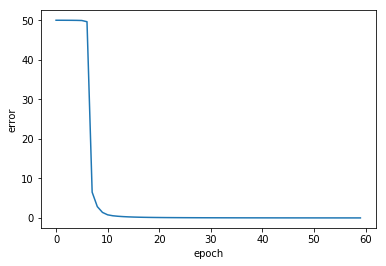

In [22]:
plt.plot(sumerr)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()